# Ch12-3 빈발 시퀀스 탐색

## 시퀀스 데이터란?

각 요소가 (순서, 값)처럼 일종의 튜플이나 벡터 형태로 구성된 데이터로, 순서가 핵심이므로 분석 시에 반드시 순서를 고려해야 함. 

순서가 있고, 각 레코드 길이가 다를 수 있기 때문에, 여러개의 값들이 순서로 연결되어있고, 각각의 값들을 보통 이벤트라고 부른다. (행동, 사건 등이 될 수 있다.)

- 로그 데이터 대부분이 순서가 있는 시퀀스 데이터임
    - 고객 구매기록
    - 고객 여정
    - 웹 서핑 기록: 웹 페이지 이동 기록을 이벤트로 하는 시퀀스 데이터라고 할 수 있음

### 시퀀스 데이터에서의 빈발 패턴

앞서 배운 연관 규칙 탐색은 순서를 고려하지 않지만, **시퀀스 데이터에서는 순서가 포인트이기 때문에 순서를 고려해야** 한다. 

만약 기록이 `[{ID:#1}, {기록: [A, B]}], [{ID:#3}, {기록: [B, A, F]}]` 이렇다면

- 비 시퀀스 데이터에서 $A \rightarrow B$ 가 출현한 ID : {#1, #3}
- 시퀀스 데이터에서 $A \rightarrow B$ 가 출현한 ID : {#1}
- 시퀀스 데이터가 아닌 경우에는 {A, B} = {B, A}  

## 지지도와 신뢰도

분석 목적에 따라 특정 패턴의 등장 여부에 대한 정의가 필요하다. 

**바로 이어서 발생한 것도 출현한 것으로 볼 것인지, 간격을 두고 발생한 것도 출현한 것으로 볼 것인지 고민이 필요하다**.

- A-B-C-D 가 있다면,
    - A-B는 출현했음
    - B-A와 E-A는 출현하지 않음
    - A-C는 등장했다고 볼 수도, 그렇지 않다고 볼 수도 있음

일반적으로, 윈도우 내(크기 $L$)에 특정 이벤트가 발생했는지를 기준으로 패턴의 등장 여부를 확인함

$L=1$이라면 바로 곧이어 등장한 것까지만 고려하는 것. length로 생각해도될듯?

- L의 개념을 들어서, A-B-C-D가 있다면
    - (L=1) A-B는 등장했음, A-C와 A-D는 등장하지 않음
    - (L=2) A-B, A-C는 등장했으나, A-D는 등장하지 않음
    - (L=3) A-B, A-C, A-D 모두 등장함

지지도와 신뢰도에 대한 정의는 일반 데이터에 대한 것과 같으나, 윈도우 개념이 등장하기 때문에, 출현 횟수를 계산하는 방식이 다르다.

## 순서를 고려한 연관규칙 탐사

일반 데이터에서는  $A \rightarrow B$(A가 부모, B가 자식인 경우)와  $B \rightarrow A$ (B가 부모, A가 자식인 경우)에 지지도가 같다.

하지만 시퀀스 데이터에 대한 연관규칙 탐사에 대해서는 순서가 중요하기 때문에  $A \rightarrow B$와  $B \rightarrow A$ 가 다른 지지도를 가질 수도 있다. 따라서 ‘같은 항목 집합’으로 부터 규칙을 생성할 수 **없다**.

또한 그렇기에, 연관규칙 탐사에서 배웠던 apiori 원리를 그대로 적용하기는 어렵다.

(신뢰도에 대한 apiori 원리는 성립한다고 교재에 적혀있음)

따라서 개별 요소(이벤트)에 다른 요소를 추가하는 방식으로 규칙을 아래와 같이 **직접** 찾아 나가야 한다. 

- 구현 내용(apiori 원리를 응용을 하는 과정)
    1. 유니크한 요소 목록 추출
    2. 빈발하는 단일 이벤트 추출: 빈발하지 않는 이벤트가 시퀀스에 섞여있다면 당연히 빈발하는 시퀀스가 아닐테니까 소거.
    3. 이벤트 추가 및 지지도 계산: 이벤트 내에 새로운 이벤트를 추가해서 지지도를 계산하다가, 
    4. 최대 빈발 아이템 집합 탐색: 어느 순간 최소 지지도 미만으로 가게 되면 그 시퀀스가 앞의 최대 빈발 아이템 집합과 같은 것이됨.
    5. 규칙 생성

## 동적 프로그래밍

앞서 만든 단계를 구현하기 위해서는 동적 프로그래밍이라는 알고리즘(개념, 기법)을 알아야 한다. 

- 원래 문제를 작은 문제로 분할한 다음 **점화식**으로 만들어 **재귀적인 형태**로 원 문제를 해결하는 방식  

- 시퀀스 데이터에 대한 연관 규칙 탐사 적용을 위한 동적 프로그래밍 구조.!
- 요소 추가를 기다리는 queue : 규칙들(시퀀스들)이 포함되어 있음
    - 그 시퀀스에 요소를 추가하고 지지도와 신뢰도를 계산함  
    - 지지도가 최소 지지도 이상이면, 다시 queue에 넣어 더 분석을 하고,  
        그렇지 않다고 한다면 거기서 끝냄.  
    - 이를 반복하여 마지막으로 Rules을 도출해냄

## 빈발 시퀀스 탐사 예시

### 순서를 고려한 연관규칙 탐사 (ex: L=2, 최소 지지도 =2)

실제로 데이터는 길이가 다 다를 수 있다.

1. 우선 각 아이템에 대한 지지도를 구한다. 비율로 구하기도 하지만, 여기서처럼 실제 등장 횟수를 사용할 수도 있다.
2. 그리고 그 아이템 다음에 각 아이템을 붙여서, 이어진 경우의 지지도를 구한다. (여기는 등장횟수를 구함)
3. 이때 L = 2이기 때문에 윈도우 크기가 2일 때이기에, 총 세 이벤트로 이루어진 윈도우 크기 안에서 해당 경우가 있다면 전부 세도록 되어있다.
    
    그리고 일반 연관 규칙 탐색이라고 한다면, 특정 이벤트가 두 번 등장이라는 개념이 없다. 하지만 여기서는 두 번 등장하는 경우도 셀 수 있다.
    
4. 그리고 최소 지지도가 2이기 때문에 2 미만인 경우들은 삭제가 된다. → 더이상 탐색하지 않는다.

### 순서를 고려한 연관규칙 탐사  (ex: L=3, 최소 지지도 =2) ←이게 맞음 
_피피티 오류인듯..._

1. 위에서(예시에서는), C는 더 이상 탐색이 안되기 때문에 C 자체로만 최대 빈발 아이템 집합에 들어가버렸다. 이론적으로는 C를 넣었지만, **이벤트 하나로 이루어진 시퀀스는 의미가 없기 때문에 삭제하는게 일반적**인 옵션인 편이다.
    
    또한 B-A에서도, B-C,  A-C끊겼으므로(3미만이므로) 들어가버린다.
    
2. 그러나 A-B는 살아있는 것이 -A, -C로 두가지 있으므로 살아있게 된다.

3. 끝까지 가서 업데이트를 한 결과, 총 6개의 아이템 집합이 나왔고, 이를 바탕으로 규칙을 만들 수 있다.

### 순서를 고려한 연관규칙 탐사 (ex: L=3, 최소 지지도 =2) - “탐색순서 만들기”
- 최대 빈발 아이템이 다음과 같을 때
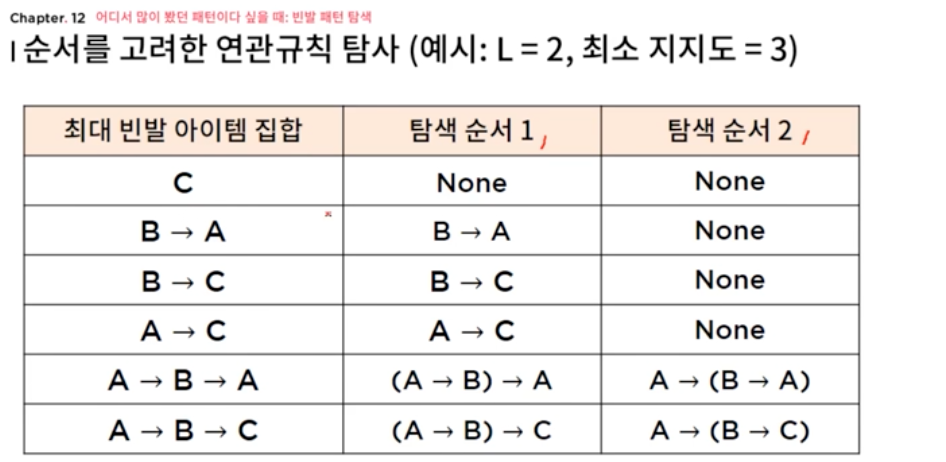

- C는 하나였기에 탐색할 것이 전혀 없다.
- B-A, B-C, A-C는 각각 하나씩 밖에 없으므로 하나씩만 탐색.
- 신뢰도와 관련한 Apiori 원리가 적용되기 때문에, (A-B)를 부모로, A를 자식으로 본 것이 최소 신뢰도 미만이면 A를 부모로, (B-A)를 자식으로 보는 것은 필요가 없어진다. 이상이라면, 보아야 할 것.

# 실습

### Please come in, Module and Data

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/2. 탐색적 데이터 분석/데이터")

print(pd.__version__)
print(np.__version__)
df = pd.read_csv("페이지내_사용자_이동.csv", encoding = "cp949")

1.4.1
1.22.4


## 데이터 확인 
아래처럼 순서가 있는 경우도 있지만, 순서가 없는 경우에는 직접 만들어도된다. 타임스탬프가 있거나 하면 직접 만들 수 있을것 같네.

In [2]:
df.head()

,고객ID,방문 페이지,순서
0,0,페이지C,1
1,0,페이지E,2
2,0,페이지B,3
3,0,페이지F,4
4,0,페이지C,5


### 시퀀스 데이터 정렬
순서가 중요한 데이터이기 때문에, (아주 관례적으로) 아이디와 순서에 따라 정렬을 한다.



In [3]:
# 고객별 방문 페이지 순서를 고려하기 위해, 정렬이 필요
df.sort_values(by = ['고객ID', '순서'], inplace = True)

### 이벤트 unique values 확인

In [4]:
page_set = df['방문 페이지'].unique()
page_set[:]

array(['페이지C', '페이지E', '페이지B', '페이지F', '페이지D', '페이지J', '메인', '페이지G',
       '페이지A', '페이지I', '페이지H'], dtype=object)

### id별 시퀀스 데이터 만들기
ndarray형태로 만들어준다. list 형태로 바꾸어도 되지만 활용성을 위해!  

_변수명이 order로 되어있었지만 여기서는 id가 적합하기 때문에 id로 바꾸었고, 이 또한 상황에 따라 적용이 조금씩 다를것으로 생각된다._

In [5]:
page_sequence_per_id = df.groupby('고객ID')['방문 페이지'].apply(np.array)
page_sequence_per_id

고객ID
0     [페이지C, 페이지E, 페이지B, 페이지F, 페이지C, 페이지D, 페이지J, 메인,...
1     [페이지B, 메인, 메인, 페이지A, 페이지F, 페이지C, 페이지I, 페이지E, 페...
2     [페이지F, 페이지J, 페이지D, 페이지G, 페이지C, 메인, 페이지I, 페이지J,...
3     [페이지I, 페이지I, 페이지J, 페이지J, 페이지C, 페이지A, 페이지H, 페이지...
4     [페이지J, 페이지H, 페이지G, 페이지G, 페이지E, 페이지C, 페이지A, 페이지...
                            ...                        
95    [페이지D, 페이지H, 페이지I, 메인, 페이지B, 페이지E, 페이지F, 페이지G,...
96    [페이지E, 페이지I, 페이지E, 페이지G, 페이지A, 페이지E, 페이지D, 페이지...
97    [페이지B, 페이지B, 메인, 메인, 페이지B, 페이지F, 페이지J, 페이지D, 페...
98                               [메인, 페이지D, 페이지F, 페이지G]
99    [페이지E, 페이지H, 페이지B, 페이지D, 페이지B, 페이지A, 페이지I, 페이지...
Name: 방문 페이지, Length: 100, dtype: object

## 함수 구현
(강사님이 직접 만든 함수라고!)

### contain_pattern(record, pattern, L)
특정 레코드 안에 특정 패턴이 발생했는지 여부를 알려주는 함수. 
L은 윈도우 크기를 의미.

itertools의 product() 함수는 가능한 모든 조합의 집합을 만들어 주는 함수이다.  

1. `output = False` 로 초기화  
2. `if` 문: `set(record) & set(pattern)!= set(pattern)` :  
        record와 pattern의 교집합이 pattern과 같지 않으면,
        즉 pattern에 포함된 모든 아이템 집합이 record에 포함된 아이템 집합에 속하지 않으면,
        그 패턴은 해당 레코드에서 일어나지 않은 것일 것.
        따라서 이 경우 `False`. `return output` 이라고 써도 무방한 줄.
3. `else` 문: 
        pattern에 적힌 것들이 record에 모두 속해있다면, 
        (아직 순서를 고려하지 않고 아이템 집합만 고려한 상태) pattern에 있는 아이템들을 순회하면서,  
        record안 어느 위치에 있는지 인덱스를 반환하여 리스트에 들어가도록 list comprehension 생성.  
    `np.where(record == item)[0]`에서 `[0]`은 `np.where`를 사용했을 때 결과가 nd.array 형태이기 때문이다. 0번째 요소만 가져오도록 하는 것.
    - 예시 
    ```
        ## 가능한 모든 조합에서 위치 간 거리가 L이하면 True를 반환
        # record = [A, B, C, A, C, C], pattern = [A, B], L = 1
        # A의 위치: [0, 3], B의 위치: [1]
        # 가능한 모든 조합: [0, 1], [3, 1]
        # 가능한 모든 조합의 거리 차이(윈도우 크기 조건): [1 - 0, 1 - 3] 중에 0번째 요소는 만족하므로 True
    ```
4. `for pattern_index in product(*pattern_index_list)`:  
        위치를 가져온 것에서 모든 조합을 뽑으려고 하는데, `*`가 붙은 건 가능한 모든 조합을 찾는다는 의미이다.  
5. `distance = `:  
        가능한 모든 조합의 거리 차이(윈도우 크기 조건). (앞 요소 - 뒷 요소)로 이루어짐.  
        예를 들어 `pattern = [A, B]`일 때 순서를 고려하게 되면, [0, 1]는 A->B가 되지만,  
        [3, 1]은 B->A이므로, 윈도우 크기에 상관없이 우리가 원하는 조건이 아니다.  
        **다시 말해 원하는 시퀀스 패턴의 가장 처음의 이벤트 위치 - 가장 마지막의 이벤트 위치**가  
          (1) 양수이고, (2) L(윈도우 크기)보다 같거나 작으면 우리가 원하는 조건이 된다.  
6. `(len(pattern_index) - 1):` 
        경우의 수가 모든 패턴에 대해 일치한다면, 이라는 의미.
        -1 은 거리를 사용하면서 무시되었었기 때문에 넣었다고 했는데 아직 잘 이해가안됨. 어찌되었든 만약 패턴 인덱스 길이가 A-B로 둘이면 2-1 로 1이라는 점. 
        `output = True` 로 마무리된다.


In [6]:
from itertools import product
def contain_pattern(record, pattern, L):
    output = False    
    if set(record) & set(pattern) != set(pattern):
        return False    
    else:
        # 패턴에 속한 개별 아이템에 대한 위치를 구하고
        pattern_index_list = [np.where(record == item)[0] for item in pattern]
        # 위치 인덱스 리스트로 조합을 만들어서 거리를 구하고
        for pattern_index in product(*pattern_index_list):
            distance = np.array(pattern_index)[1:] - np.array(pattern_index)[:-1]
            # L과 순서를 고려해 패턴 발생여부를 T/F
            if sum((distance <= L) & (distance > 0)) == (len(pattern_index) - 1):
                output = True
                break
        
        return output

### find_maximum_frequent_sequence_item(item_set, sequence_data, min_support = 0.01, L = 1)
빈발하는 시퀀스 아이템 찾는 함수.  

아이템 집합과, 시퀀스 데이터, 최소 지지도, L을 입력받는다.  
시퀀스가 굉장히 큰 경우 L을 크게 두는 경우도 존재하긴 하지만, 보통은 1로 설정하는 것이 일반적이다.  

1. `queue` : 탐색할 대상을 넣을 리스트 큐  
    `maximum_frequent_sequence_item` : 최대 빈발 시퀀스 초기화
2. `for item in item_set:`:  
        item_set 은 여기서는 방문 페이지가 될 것이다. (이벤트)
        얼마나 등장했는지 확인하는데, 이때 `contain_pattern` 함수를 `apply` 하여 적용. 
        시퀀스 데이터의 각 레코드가 어떤 패턴을 갖고 있는지 보기 위함이며,  
        이 아이의 파라미터로 pattern과 L이 들어가는데 이를 그대로 뒤에 적어준다.  
        찾고자 하는 패턴은 아이템 한개짜리로 구성된 시퀀스다.  
        마지막에 `.sum()`을 사용하여 몇번이나 등장했는지 계산하여 `occurence`에 저장.
3. `if occurence / len(sequence_data) >= min_support:`:  
        등장 횟수를 시퀀스 데이터의 레코드 개수로 나누었을 때 최소 지지도 이상인지 확인하여,  
        최소 지지도 이상이면 더 탐색할 가치가 있기 때문에 `queue`에 해당 시퀀스 아이템을 넣는다.  

4. `while queue:`:  
        큐에는 단일 아이템들로만 구성이 되어 있을 텐데, 
        `pop()`으로 맨 마지막 값을 뺀다(리스트에서 삭제됨). 지금은 하나의 아이템이기 때문에 하나만 나오게되어있지만, 뒤에 시퀀스를 다루면서 시퀀스로 나올 수도 있다.  
    
5. `check_maximum_frequent = True ` : 
        빼온 아이템(시퀀스)가 최대 빈발 아이템인지 확인한다.  
        모든 자식 집합이 min_support를 넘기지 않으면 True를 유지하도록 되어있다.  
        하나라도 예외가 있다면 `False`로 바뀔 것이다.  
6. `for item in item_set:` :  
    다시 item_set을 순회한다. 위의 2번 문항을 다시 반복하는데,  
    ```py
    occurence = sequence_data.apply(contain_pattern, pattern = current_pattern + [item], L = L).sum()
    ```
        위와 같은 형태로, 현재 패턴에 item을 추가시키도록 한다.  
        하나를 뺀 상태의 current_pattern에 아이템을 추가시켰을 때, 모두 빈발하지 않다 라고 하면, 현재 패턴이 최대 빈발 패턴일테고, 모두 빈발이라면 지금 패턴이 최대 빈발 패턴이 아닐것이다.  

7. `if occurence / len(sequence_data) >= min_support: `:  
        그렇게 아이템을 추가한 것이 지지도를 계산했을 때 최소 지지도를 넘으면(빈발하다면) 현재 패턴은 최대 빈발하지 않다. 그래서 False가 된다. (?)
        그리고 현재 패턴(더해서 지지도를 구하기 전의 패턴)은 queue에 추가된다.

8. `if check_maximum_frequent and len(current_pattern) > 1:`:  
        최대 빈발이고, 현재 패턴의 길이가 1 초과인 경우(패턴길이가 1 즉 이벤트 하나인 경우는 넣기에 문제가 될 가능성이 다분하다.)
        그래서 그경우 현재 패턴을 최대 빈발 아이템들 리스트에 넣어준다.

9. 그리고 최종적으로 최대 빈발 시퀀스 아이템들을 반환하도록 한다. 

In [7]:
def find_maximum_frequent_sequence_item(item_set, sequence_data, min_support = 0.01, L = 1):
    queue = []
    maximum_frequent_sequence_item = []
    
    # 유니크한 아이템 집합에 대해, min_support가 넘는 아이템들만 queue에 추가시킴
    for item in item_set:
        occurence = sequence_data.apply(contain_pattern, pattern = [item], L = L).sum()
        if occurence / len(sequence_data) >= min_support:
            queue.append([item])

    while queue:
        current_pattern = queue.pop()
        # 모든 자식 집합이 min_support를 넘기지 않으면 True를 유지
        check_maximum_frequent = True
        for item in item_set:
            occurence = sequence_data.apply(contain_pattern, pattern = current_pattern + [item], L = L).sum()
            if occurence / len(sequence_data) >= min_support: 
                check_maximum_frequent = False 
                # min_support를 넘는 패턴을 queue에 추가
                queue.append(current_pattern + [item])
        
        if check_maximum_frequent and len(current_pattern) > 1:
            maximum_frequent_sequence_item.append(current_pattern)        
    
    return maximum_frequent_sequence_item

### generate_association_rules(maximum_frequent_sequence_item, sequence_data, min_support = 0.01, min_confidence = 0.5, L = 1)

시퀀스의 빈발 패턴을 찾는 함수이다.  
`maximum_frequent_sequence_item` 을 통해 얻은 최대 빈발 아이템 리스트와, 원래 시퀀스 데이터와, 최소 지지도, 최소 신뢰도, 윈도우 길이를 입력으로 받는다.  

1. `result = {"부모":[], "자식":[], "지지도":[], "신뢰도":[]}`: 
        결과를 사전 형태로 정의했다. 나중에 데이터 프레임으로 만들기 원활하기 때문이다.  
        혹은 value들만 리스트로 받아서 그 리스트를 데이터프레임으로 바꾸어도 좋다.  
        
2. `for sequence_item in maximum_frequent_sequence_item:`:
        앞서 구한 최대 빈발 아이템들을 `sequence_item`라는 이름으로 받아서 순회한다.  
        `co_occurence` : 이때 원래 데이터에서 현재 찾는 `sequence_item`이 등장한 여부를 계산한다. sum()으로, 원래 데이터들 중에서 `sequence_item`이 등장하고 있는 레코드의 총 개수를 구할 것이다.  
        즉 L이라는 윈도우 사이즈에서, A -> B에서 A, B를 모두 포함하는 가짓 수 co_occurence 를 계산한다. 
        그리고 이에대한 지지도를 구한다.
        
3. `if co_occurence > min_support:`:
        이 부분은 위에서 같은 지지도로 적어두었을 경우 여기서도 당연히 충족이 되겠지만, 함수 사용시 지지도를 바꿀 수도 있기 때문에 적어둔다.  
        최소 지지도 이상일 경우,  
        **한 아이템 집합에 대해, 부모의 크기를 1씩 줄여나가는 방식으로 부모와 자식 설정**한다.  
        i가 일찍 커졌다가 줄어드는 형태로 range를 정의해두었다.  
        ```
        antecedent = sequence_item[:i]
        consequent = sequence_item[i:]
        ```
        시퀀스 아이템 길이가 10이라면, 부모는 처음에 0~9번째, 다음에는 0~8번째 까지 될 것이다.  
        **신뢰도에 Apiori 원리가 적용되기 때문이다.** 부모의 등장 비율만 보면 된다.  
        신뢰도를 분모에 부모의 등장 비율, 분자에 부모와 자식의 등장 비율이 나오는데, 그 등장 비율은 사실 바로 위의 `co_occurence`와 같다. 그래서 굳이 반복 계산을 하지 않고 부모의 발생 비율만 본다.  
        
4. `if confidence > min_confidence:` :
        신뢰도가 최소 신뢰도보다 높다면, 그 값들을 각각 대응되는 사전에 추가한다. 
        그리고 데이터 프레임으로 변환하여 출력하도록 한다.  



In [8]:
def generate_association_rules(maximum_frequent_sequence_item, 
                               sequence_data, 
                               min_support = 0.01, min_confidence = 0.5, L = 1):
    # 결과 초기화 (데이터프레임으로 만들기 위함)
    result = {"부모":[], "자식":[], "지지도":[], "신뢰도":[]}
        
    for sequence_item in maximum_frequent_sequence_item:
        co_occurence = sequence_data.apply(contain_pattern, 
                                           pattern = sequence_item, L = L).sum()
        support = co_occurence / len(sequence_data)
        
        if co_occurence > min_support:
            for i in range(len(sequence_item)-1, 0, -1):
                antecedent = sequence_item[:i]
                consequent = sequence_item[i:]
                antecedent_occurence = sequence_data.apply(contain_pattern, 
                                                           pattern = antecedent, L = L).sum()
                
                confidence = co_occurence / antecedent_occurence
                if confidence > min_confidence:
                    result['부모'].append(antecedent)
                    result['자식'].append(consequent)
                    result['지지도'].append(support)
                    result['신뢰도'].append(confidence)
            
    return pd.DataFrame(result)

## 빈발 시퀀스 구하기

`page_set`이 아이템셋이 될 것이다. 그래서 함수에 입력하여 정의에 넣는다.

그리고 generate_association_rules를 사용하여 지지도와 신뢰도를 구한다.

L은 전부 1로 계산하였다. 

In [10]:
maximum_frequent_sequence_item = find_maximum_frequent_sequence_item(page_set, page_sequence_per_id, min_support = 0.02, L = 1)

In [12]:
result = generate_association_rules(maximum_frequent_sequence_item, page_sequence_per_id, min_support = 0.01, min_confidence = 0, L = 1)
result.sort_values(by = ['지지도', '신뢰도'], ascending = False)

,부모,자식,지지도,신뢰도
160,[페이지B],[페이지J],0.07,0.155556
59,[페이지A],[페이지C],0.07,0.148936
109,[페이지J],[페이지D],0.07,0.142857
115,[페이지J],[페이지C],0.07,0.142857
75,[메인],[페이지H],0.06,0.150000
...,...,...,...,...
205,[페이지C],"[메인, 페이지A, 페이지J]",0.02,0.037037
207,[페이지C],"[메인, 페이지E]",0.02,0.037037
209,[페이지C],"[페이지J, 페이지I]",0.02,0.037037
214,[페이지C],"[페이지E, 메인]",0.02,0.037037


코드 자체를 작성하는건, 이해하는건 쉬운 난이도가 아니다.  
하지만 mlxstand나 누가 만든 함수를 사용하기만 하면 되지 해석까지 할 필요는 없다.  
이해해서 과업에 맞게 수정하여 사용하는 것이 베스트이고, 실력이 부족하여 수정이 어렵다면 이를 모듈로 만들어도 되고 필요할 때마다 가져다 쓰는 것도 나쁘지 않다.  



## 원본(설명포함)
```py
from itertools import product
def contain_pattern(record, pattern, L):
    output = False    
    if set(record) & set(pattern) != set(pattern): # pattern에 포함된 모든 아이템 집합이 record에 포함된 아이템 집합에 속하지 않으면
        return False    
    else:
        # 패턴에 속한 개별 아이템에 대한 위치를 미리 구하기
        pattern_index_list = [np.where(record == item)[0] for item in pattern]
        
        ## 가능한 모든 조합에서 위치 간 거리가 L이하면 True를 반환
        # record = [A, B, C, A, C, C], pattern = [A, B], L = 1
        # A의 위치: [0, 3], B의 위치: [1]
        # 가능한 모든 조합: [0, 1], [3, 1]
        # 가능한 모든 조합의 거리 차이: [1 - 0, 1 - 3] 중에 0번째 요소는 만족하므로 True
        
        for pattern_index in product(*pattern_index_list):
            distance = np.array(pattern_index)[1:] - np.array(pattern_index)[:-1]
            if sum((distance <= L) & (distance > 0)) == (len(pattern_index) - 1):
                output = True
                break
        
        return output



def find_maximum_frequent_sequence_item(item_set, sequence_data, min_support = 0.01, L = 1):
    queue = []
    maximum_frequent_sequence_item = []
    
    # 유니크한 아이템 집합에 대해, min_support가 넘는 아이템들만 queue에 추가시킴
    for item in item_set:
        occurence = sequence_data.apply(contain_pattern, pattern = [item], L = L).sum()
        if occurence / len(sequence_data) >= min_support:
            queue.append([item])

    while queue:
        current_pattern = queue.pop() # 맨 마지막 값 빼기
        check_maximum_frequent = True # 모든 자식 집합이 min_support를 넘기지 않으면 True를 유지
        for item in item_set:
            occurence = sequence_data.apply(contain_pattern, pattern = current_pattern + [item], L = L).sum()
            if occurence / len(sequence_data) >= min_support: # min_support를 넘는 패턴을 queue에 추가
                check_maximum_frequent = False 
                queue.append(current_pattern + [item])
        
        if check_maximum_frequent and len(current_pattern) > 1:
            maximum_frequent_sequence_item.append(current_pattern)        
    
    return maximum_frequent_sequence_item



def generate_association_rules(maximum_frequent_sequence_item, sequence_data, min_support = 0.01, min_confidence = 0.5, L = 1):
    # 결과 초기화
    result = {"부모":[], "자식":[], "지지도":[], "신뢰도":[]}
        
    for sequence_item in maximum_frequent_sequence_item:
        # A -> B에서 A, B를 모두 포함하는 가짓 수 co_occurence 계산
        co_occurence = sequence_data.apply(contain_pattern, pattern = sequence_item, L = L).sum()
        support = co_occurence / len(sequence_data)
        if co_occurence > min_support:
            for i in range(len(sequence_item)-1, 0, -1): # 한 아이템 집합에 대해, 부모의 크기를 1씩 줄여나가는 방식으로 부모와 자식 설정
                antecedent = sequence_item[:i]
                consequent = sequence_item[i:]
                antecedent_occurence = sequence_data.apply(contain_pattern, pattern = antecedent, L = L).sum()
                
                confidence = co_occurence / antecedent_occurence
                if confidence > min_confidence:
                    result['부모'].append(antecedent)
                    result['자식'].append(consequent)
                    result['지지도'].append(support)
                    result['신뢰도'].append(confidence)
            
    return pd.DataFrame(result)
```
